In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

### Read in csv of home sales data from Zillow

In [98]:
df = pd.read_csv('..\data\single_family_home_values.csv')

In [99]:
df.head(10)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaN,NaN,488840
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676
5,3523925,6535 W Sumac Ave,Denver,CO,80123,39.615136,-105.069018,3,5.0,7,2051,6045,1996.0,2006-09-12,363500,2005-05-16,339000.0,496062
6,30560679,6673 W Berry Ave,Denver,CO,80123,39.616350,-105.070760,4,4.0,8,2051,6315,1997.0,2014-12-15,420000,2006-07-07,345000.0,514953
7,39623928,5640 S Otis St,Denver,CO,80123,39.615213,-105.070617,3,3.0,7,2051,8133,1997.0,2004-03-15,328700,1998-04-09,225200.0,494321
8,148975825,5342 S Gray St,Denver,CO,80123,39.620158,-105.063094,3,3.0,7,1796,5038,1999.0,2011-08-16,274900,2011-01-10,0.0,496079
9,184623176,4967 S Wadsworth Blvd,Denver,CO,80123,39.626770,-105.081990,3,3.0,0,2054,4050,2007.0,2015-12-01,407000,2012-10-30,312000.0,424514


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         14985 non-null  float64
 6   longitude        14985 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        14999 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    11173 non-null  object 
 16  priorSaleAmount  11287 non-null  float64
 17  estimated_va

In [101]:
df.describe()

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
count,1.500000e+04,15000.000000,14985.000000,14985.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,14999.000000,1.500000e+04,1.128700e+04,1.500000e+04
mean,5.176229e+07,80204.919467,39.740538,-104.964076,2.708400,2.195067,6.164133,1514.504400,5820.76620,1929.517168,4.053563e+05,2.594350e+05,6.371625e+05
std,6.190876e+07,9.715263,0.023555,0.039788,0.897231,1.166279,1.958601,830.635999,3013.27947,29.937051,7.756998e+05,3.379387e+05,5.044185e+05
min,1.433670e+05,80022.000000,39.614531,-105.108440,0.000000,0.000000,0.000000,350.000000,278.00000,1874.000000,2.590000e+02,0.000000e+00,1.477670e+05
25%,1.004802e+07,80205.000000,39.727634,-104.978737,2.000000,1.000000,5.000000,986.000000,4620.00000,1907.000000,1.940000e+05,1.100000e+05,3.984348e+05
50%,2.563241e+07,80206.000000,39.748048,-104.957689,3.000000,2.000000,6.000000,1267.500000,5950.00000,1925.000000,3.200000e+05,2.100000e+05,5.183575e+05
75%,5.114222e+07,80207.000000,39.758214,-104.937522,3.000000,3.000000,7.000000,1766.250000,6270.00000,1949.000000,4.632000e+05,3.302400e+05,6.879692e+05
max,3.209481e+08,80209.000000,39.888020,-104.830930,15.000000,12.000000,39.000000,10907.000000,122839.00000,2016.000000,4.560000e+07,1.600000e+07,1.014531e+07


### Reducing number of features in the dataset

In [391]:
df = df[df['squareFootage'] <= 5000]
df = df[df['rooms'] < 20]
df = df[df['estimated_value'] < 5000000]
df = df[df['lotSize'] < 10000]
df = df[df['bathrooms'] < 6]
df = df[df['bedrooms'] < 6]

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14246 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               14246 non-null  int64  
 1   address          14246 non-null  object 
 2   city             14246 non-null  object 
 3   state            14246 non-null  object 
 4   zipcode          14246 non-null  int64  
 5   latitude         14233 non-null  float64
 6   longitude        14233 non-null  float64
 7   bedrooms         14246 non-null  int64  
 8   bathrooms        14246 non-null  float64
 9   rooms            14246 non-null  int64  
 10  squareFootage    14246 non-null  int64  
 11  lotSize          14246 non-null  int64  
 12  yearBuilt        14245 non-null  float64
 13  lastSaleDate     14246 non-null  object 
 14  lastSaleAmount   14246 non-null  int64  
 15  priorSaleDate    10687 non-null  object 
 16  priorSaleAmount  10784 non-null  float64
 17  estimated_va

In [393]:
X =df.drop('estimated_value', axis=1)
X= X[['bedrooms', 'bathrooms',  'rooms', 'squareFootage','lotSize', 'yearBuilt']]

In [394]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14246 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       14246 non-null  int64  
 1   bathrooms      14246 non-null  float64
 2   rooms          14246 non-null  int64  
 3   squareFootage  14246 non-null  int64  
 4   lotSize        14246 non-null  int64  
 5   yearBuilt      14245 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 779.1 KB


In [395]:
X.fillna(0, inplace=True)

X.head()

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt
0,3,2.0,6,1378,9968,2003.0
1,2,2.0,6,1653,6970,2004.0
4,3,4.0,8,2305,5600,1998.0
5,3,5.0,7,2051,6045,1996.0
6,4,4.0,8,2051,6315,1997.0


In [396]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14246 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       14246 non-null  int64  
 1   bathrooms      14246 non-null  float64
 2   rooms          14246 non-null  int64  
 3   squareFootage  14246 non-null  int64  
 4   lotSize        14246 non-null  int64  
 5   yearBuilt      14246 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 779.1 KB


### Looking at KMeans and silhouette analysis

In [397]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [398]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [399]:
labels = kmeans.labels_

In [400]:
kmeans.cluster_centers_[0]

array([2.40109589e+00, 1.73360731e+00, 5.26812785e+00, 1.11704292e+03,
       6.26145187e+03, 1.93941772e+03])

In [401]:
X['cluster']=labels
X.groupby('cluster').median()

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt
cluster,,,,,,
0,2,2.0,5,1064,6250,1947.0
1,3,2.0,6,1309,3125,1893.0
2,3,2.0,6,1344,4690,1911.0
3,3,2.0,6,1222,7880,1948.0
4,3,4.0,8,2612,6250,1923.0


In [402]:
X=X.drop('cluster', axis=1)

In [403]:
from sklearn.metrics import silhouette_score

In [404]:
for i in range(3,10):
    kmeans=KMeans(n_clusters=i).fit(X)
    labels = kmeans.labels_
    print (silhouette_score(X, labels))

0.5095037886426492
0.49627507821110134
0.5241962605790821
0.5170940106052428
0.5022322985178752
0.46258146114339455
0.45858934295947873


### Linear Regression plots for each feature

In [405]:
## Creating Linear Regression function to create lines for analysis
from sklearn.linear_model import LinearRegression, LogisticRegression

def lrl(x,y):
    model = LinearRegression()
    model.fit(X,y)
    x_min = np.array([[X.min()]])
    x_max = np.array([[X.max()]])
    y_min = model.predict(x_min)
    y_max = model.predict(x_max)
    
    return x_min, x_max, y_min, y_max

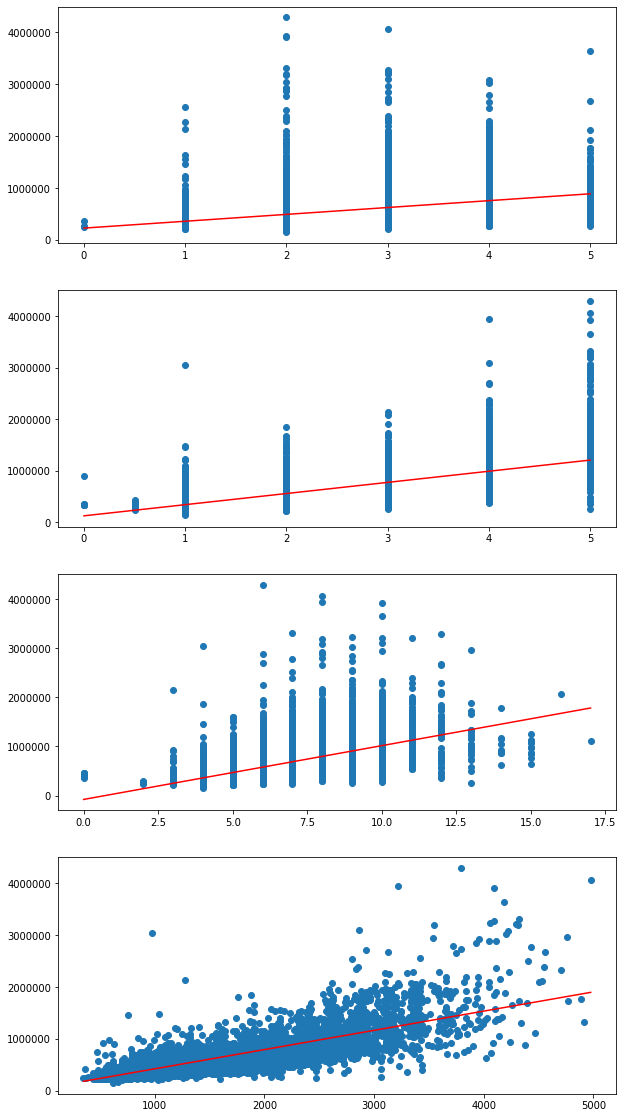

In [406]:
fig, axs = plt.subplots(4, figsize=(10,20))


for i in range (7,11):
    y = df.estimated_value.values.reshape(-1,1)
    X = df.iloc[:,i].values.reshape(-1,1)
    
    x_min, x_max, y_min, y_max = lrl(X,y)
    

    axs[i-7].scatter(y=df.estimated_value, x=df.iloc[:,i])
    axs[i-7].plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

### Linear Regression using Train and Test

In [407]:
from sklearn.linear_model import LinearRegression, LogisticRegression 

from sklearn.svm import SVC, SVR

from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [447]:
X =df.drop('estimated_value', axis=1)
X= X[['bedrooms', 'bathrooms',  'rooms', 'squareFootage','lotSize', 'yearBuilt', 'lastSaleAmount']]
# X= X[['bedrooms', 'bathrooms',  'rooms', 'squareFootage','lotSize', 'yearBuilt']]
X.fillna(0, inplace=True)
X.head(10)

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount
0,3,2.0,6,1378,9968,2003.0,75000
1,2,2.0,6,1653,6970,2004.0,216935
4,3,4.0,8,2305,5600,1998.0,308000
5,3,5.0,7,2051,6045,1996.0,363500
6,4,4.0,8,2051,6315,1997.0,420000
7,3,3.0,7,2051,8133,1997.0,328700
8,3,3.0,7,1796,5038,1999.0,274900
9,3,3.0,0,2054,4050,2007.0,407000
10,3,4.0,7,2568,6397,2000.0,638000
11,3,2.0,6,1290,9000,1962.0,235000


In [448]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14246 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedrooms        14246 non-null  int64  
 1   bathrooms       14246 non-null  float64
 2   rooms           14246 non-null  int64  
 3   squareFootage   14246 non-null  int64  
 4   lotSize         14246 non-null  int64  
 5   yearBuilt       14246 non-null  float64
 6   lastSaleAmount  14246 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 890.4 KB


In [449]:
y=df.estimated_value.values.reshape(-1,1)

In [450]:
lg = LinearRegression()
lg.fit(X,y)
lg.score(X,y)

0.691088250755643

In [451]:
X_train, X_test, y_train, y_test= train_test_split(X,y)

In [452]:
X_train.shape, y_train.shape

((10684, 7), (10684, 1))

In [453]:
lg = LinearRegression()
lg.fit(X_train,y_train) # training , fit 
lg.score(X_test,y_test) # evaluate , score, R2 

0.6341644837367575

In [454]:
from sklearn.metrics import mean_squared_error

predictions = lg.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = lg.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

# Not a very good MSW or R2 for this dataset

MSE: 33832479876.1242, R2: 0.6341644837367575


In [457]:
house = np.array([3, 5.0, 7, 2051, 6045, 1996.0, 363500]).reshape(-1,1).transpose()
house

array([[3.000e+00, 5.000e+00, 7.000e+00, 2.051e+03, 6.045e+03, 1.996e+03,
        3.635e+05]])

In [458]:
y_pred = lg.predict(house)
y_pred

array([[967285.84749762]])

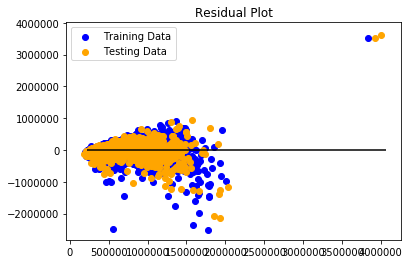

In [459]:
predictions = lg.predict(X_test)
lg.fit(X_train, y_train)
plt.scatter(lg.predict(X_train), lg.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(lg.predict(X_test), lg.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [460]:
# Scaling the dataset
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [461]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [462]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
model.score(X_test_scaled, y_test_scaled)

0.6341644837340403

In [463]:
y_scaled_pred = model.predict(house)
y_scaled_pred

array([[50947.99623294]])

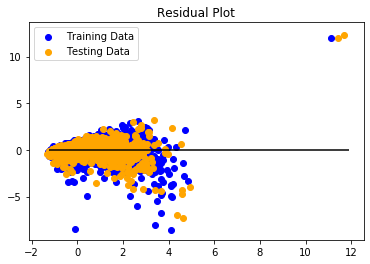

In [464]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [465]:
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.39188574839495527, R2: 0.6341644837340403


In [466]:
y_pred_scale = model.predict(house)
y_pred_scale

array([[50947.99623294]])

In [426]:
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.26794306418513963, R2: 0.6970273167435324


In [427]:
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.268110557521321, R2: 0.6968379261144271


In [428]:
y_pred_ridge = ridge.predict(house)
y_pred_ridge

array([[1601.57430715]])

In [429]:
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2674348292306008, R2: 0.6976019959514814


In [430]:
y_pred_elas = elasticnet.predict(house)
y_pred_elas

array([1540.23445795])

### PCA Analysis

In [431]:
df2 = df[['bedrooms', 'bathrooms',  'rooms', 'squareFootage','lotSize', 'yearBuilt','lastSaleAmount']]
df2 = df2[df2['yearBuilt'] > 1990]
df2.head()

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount
0,3,2.0,6,1378,9968,2003.0,75000
1,2,2.0,6,1653,6970,2004.0,216935
4,3,4.0,8,2305,5600,1998.0,308000
5,3,5.0,7,2051,6045,1996.0,363500
6,4,4.0,8,2051,6315,1997.0,420000


In [432]:
X2 = StandardScaler().fit_transform(df2)
Xt = X2.T
Cx = np.cov(Xt)
print ('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00126904  0.14466126  0.30340852  0.20353244  0.11146633  0.10503963
  -0.0167639 ]
 [ 0.14466126  1.00126904  0.58878799  0.76110631  0.39033873  0.18532462
   0.60450573]
 [ 0.30340852  0.58878799  1.00126904  0.67830234  0.3040281   0.03785298
   0.48375617]
 [ 0.20353244  0.76110631  0.67830234  1.00126904  0.54505095  0.16122725
   0.70823085]
 [ 0.11146633  0.39033873  0.3040281   0.54505095  1.00126904 -0.0677365
   0.31406348]
 [ 0.10503963  0.18532462  0.03785298  0.16122725 -0.0677365   1.00126904
   0.11367529]
 [-0.0167639   0.60450573  0.48375617  0.70823085  0.31406348  0.11367529
   1.00126904]]


In [433]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 7).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print ('The percentage of total variance in the dataset explained by each component calculated by hand \n',  eig_val_cov / sum(eig_val_cov))


Eigenvector 1: 
[[0.15136269]
 [0.47202591]
 [0.43243983]
 [0.51807684]
 [0.32594709]
 [0.10088617]
 [0.42714581]]
Eigenvalue 1: 3.2786054806652656
----------------------------------------
Eigenvector 2: 
[[ 0.61894985]
 [ 0.00762359]
 [ 0.07956972]
 [-0.04018399]
 [-0.31659078]
 [ 0.68987847]
 [-0.18092773]]
Eigenvalue 2: 1.0938042251510927
----------------------------------------
Eigenvector 3: 
[[-0.66138279]
 [ 0.13965831]
 [-0.20514719]
 [ 0.03621255]
 [-0.2654723 ]
 [ 0.57710436]
 [ 0.31007525]]
Eigenvalue 3: 1.0146354219158287
----------------------------------------
Eigenvector 4: 
[[ 0.04701413]
 [ 0.26691824]
 [ 0.22167972]
 [-0.85219515]
 [ 0.23449788]
 [ 0.0667054 ]
 [ 0.30286464]]
Eigenvalue 4: 0.16090513600080372
----------------------------------------
Eigenvector 5: 
[[-0.38399202]
 [ 0.16548457]
 [ 0.58263004]
 [-0.03109603]
 [ 0.06863368]
 [ 0.12651971]
 [-0.68119193]]
Eigenvalue 5: 0.41077645570971405
----------------------------------------
Eigenvector 6: 
[[ 0.0830

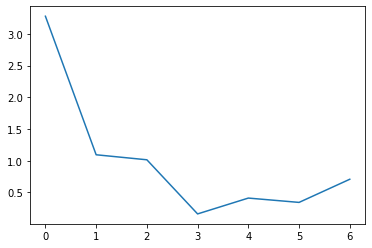

In [434]:
plt.plot(eig_val_cov)
plt.show()

### Random Forest

In [435]:
from sklearn import tree

In [436]:
df3 = df[['bedrooms', 'bathrooms',  'rooms', 'squareFootage','lotSize', 'yearBuilt', 'estimated_value']]
df3 = df3[df3['yearBuilt'] > 1990]
df3.fillna(0, inplace=True)

In [437]:
target = df3['estimated_value']

data = df3.drop('estimated_value', axis=1)
feature_names = data.columns
data.head()

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt
0,3,2.0,6,1378,9968,2003.0
1,2,2.0,6,1653,6970,2004.0
4,3,4.0,8,2305,5600,1998.0
5,3,5.0,7,2051,6045,1996.0
6,4,4.0,8,2051,6315,1997.0


In [438]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)

In [439]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.0

In [440]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [441]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.0

In [442]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [443]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.2809208355788218, 'lotSize'),
 (0.2776908645960443, 'squareFootage'),
 (0.1810572679868328, 'yearBuilt'),
 (0.11582164704379534, 'rooms'),
 (0.08235676439713119, 'bathrooms'),
 (0.06215262039737463, 'bedrooms')]

### KNN Analysis

In [444]:
X_scaler = StandardScaler().fit(X_train)

In [445]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.932/0.000
k: 3, Train/Test Score: 0.325/0.000
k: 5, Train/Test Score: 0.173/0.000
k: 7, Train/Test Score: 0.117/0.000
k: 9, Train/Test Score: 0.085/0.000
k: 11, Train/Test Score: 0.066/0.000
k: 13, Train/Test Score: 0.044/0.000
k: 15, Train/Test Score: 0.037/0.000
k: 17, Train/Test Score: 0.032/0.000
k: 19, Train/Test Score: 0.030/0.000


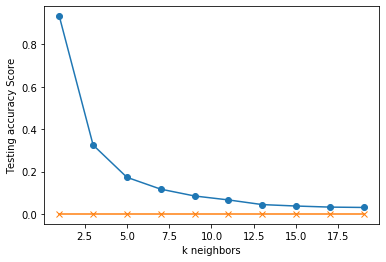

In [446]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [390]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.000
